In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### entropy

In [2]:
with open('./dataset/intervention_data/gpt2_train=False_entropy.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [3]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=False_Total.csv')
positive_effect = total_data.loc[total_data['entropy']>0].index
negative_effect = total_data.loc[total_data['entropy']<0].index

In [4]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [5]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [6]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        df_list.append(df)
        mean_df+=df

        v_arr = np.array(v)
        var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/len(positive_effect)
    

In [7]:
mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.020388,-0.013937,0.000748,0.000527,0.000298,0.000492,0.000486,0.000444,0.000483,0.000408,0.000438,0.000556,0.000426
neuron 1,-0.008384,0.000578,0.000507,0.000450,0.000345,0.000566,0.000511,0.000485,0.000599,0.000451,0.000408,0.000379,0.000425
neuron 2,0.001358,0.008948,-0.000040,0.000607,0.000492,0.000570,0.000743,0.000448,0.000619,0.000512,0.000389,0.000581,0.000426
neuron 3,-0.003366,-0.002665,-0.002492,0.000669,0.000470,0.000614,0.000698,0.000735,0.000469,0.000396,0.000540,0.000377,0.000426
neuron 4,-0.004830,-0.002090,0.001065,0.000530,0.000448,0.000447,0.000476,0.000500,0.000519,0.000507,0.000392,0.000438,0.000426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.003131,0.002430,-0.000320,0.000483,0.000447,0.000497,0.000301,0.000539,0.000472,0.000462,0.000446,0.000417,0.000426
neuron 764,-0.012151,-0.000212,0.001460,0.000729,0.000535,0.000708,0.000583,0.000481,0.000443,0.000448,0.000490,0.000381,0.000426
neuron 765,0.005760,-0.000584,-0.000455,0.000540,0.000358,0.000159,0.000339,0.000639,0.000149,0.000376,0.000442,0.000441,0.000425
neuron 766,0.010281,-0.000915,-0.000254,0.000455,0.000569,0.000383,0.000484,0.000491,0.000521,0.000451,0.000409,0.000483,0.000426


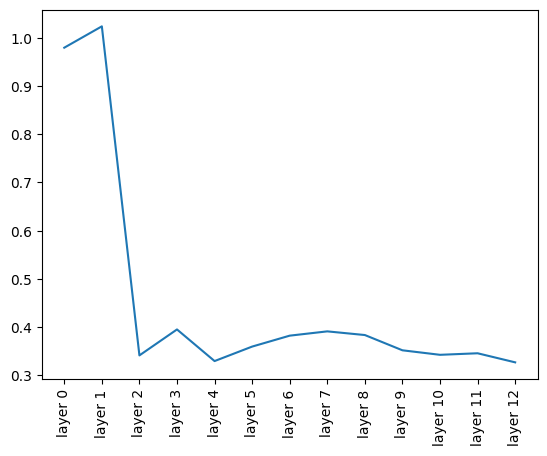

In [8]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

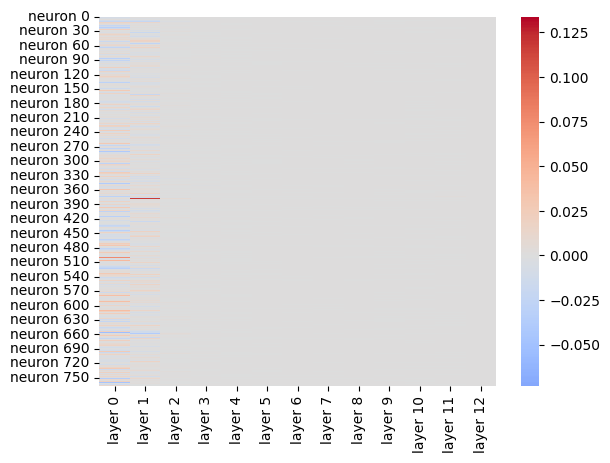

In [9]:
sns.heatmap(mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

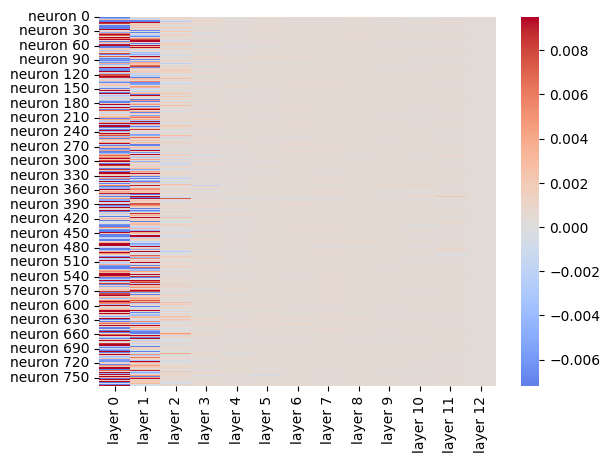

In [10]:
sns.heatmap(mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

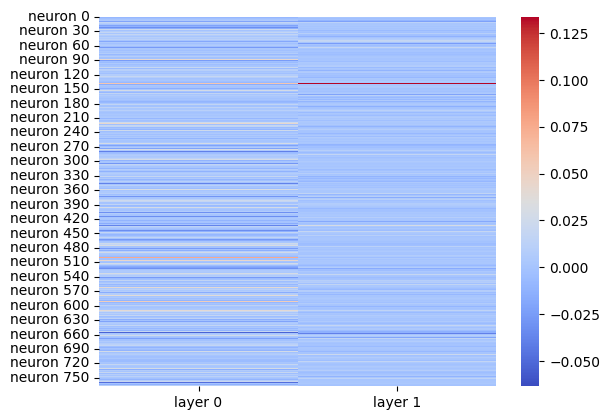

In [11]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

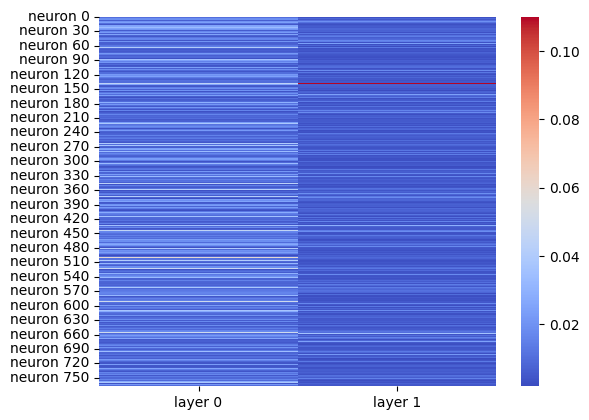

In [12]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm')

## Fine tuning Indirect Effect

### entropy

In [13]:
with open('./dataset/intervention_data/gpt2_train=True_entropy.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [14]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=True_Total.csv')
positive_effect = total_data.loc[total_data['entropy']>0].index
negative_effect = total_data.loc[total_data['entropy']<0].index

In [15]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [16]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [17]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        fine_df_list.append(df)
        fine_mean_df+=df

        v_arr = np.array(v)
        fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(fine_var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/len(positive_effect)
    

In [18]:
len(fine_df_list)

4380

In [19]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,-0.031180,0.002385,0.000569,-0.000001,-0.000486,-0.000025,-0.000037,-0.000239,-4.314470e-05,-0.000076,0.000276,0.000165,-0.000083
neuron 1,0.007470,0.001407,0.000153,-0.000279,0.001015,0.000559,-0.000168,-0.000482,-3.278104e-04,0.000070,-0.000131,-0.001125,-0.000083
neuron 2,-0.013845,-0.002869,0.000116,0.000915,-0.000234,0.000003,-0.000125,0.000060,1.305603e-04,0.000009,0.000038,0.000060,-0.000083
neuron 3,0.005218,0.000633,-0.000312,0.000131,0.000366,-0.000560,-0.000196,-0.000076,-8.908853e-07,-0.000146,-0.000159,0.000008,-0.000083
neuron 4,0.000739,0.003937,-0.000452,0.001051,0.000200,-0.000214,0.000228,0.000297,-4.661002e-06,-0.000093,-0.000080,0.000046,-0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.002319,0.001240,0.000129,0.000643,0.000298,-0.000126,-0.000086,-0.000075,4.678385e-05,-0.000025,-0.000093,0.000054,-0.000083
neuron 764,0.005187,-0.000526,-0.000102,-0.000098,0.000108,-0.000150,-0.000042,-0.000013,6.816518e-05,0.000002,0.000285,0.000070,-0.000083
neuron 765,-0.024024,0.000015,-0.000352,-0.000189,-0.000482,-0.000918,-0.000243,-0.000207,-9.526160e-04,-0.000027,-0.000725,-0.000174,-0.000083
neuron 766,0.005471,-0.001934,-0.000236,0.000150,0.000005,-0.000020,-0.000170,0.000320,-2.323737e-05,0.000145,-0.000088,-0.000041,-0.000083


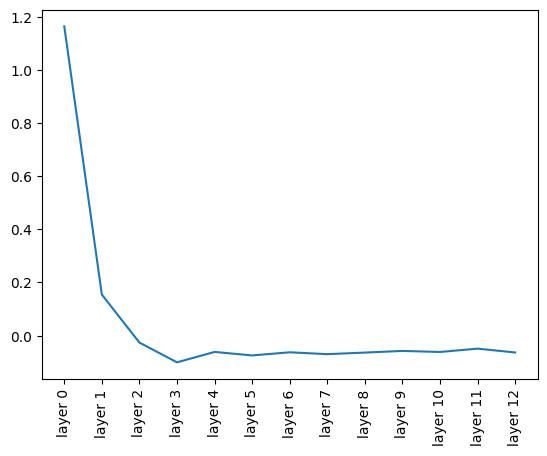

In [20]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

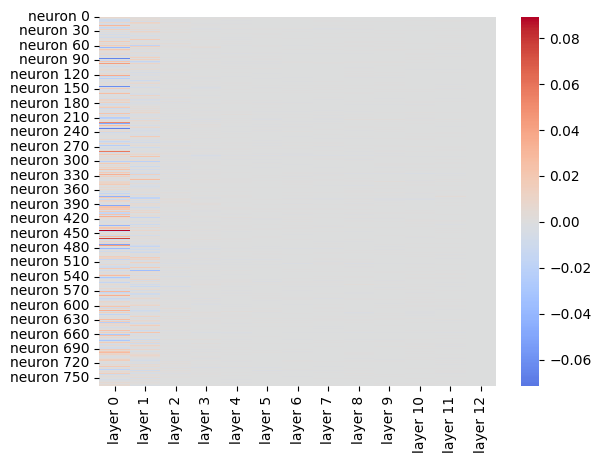

In [21]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

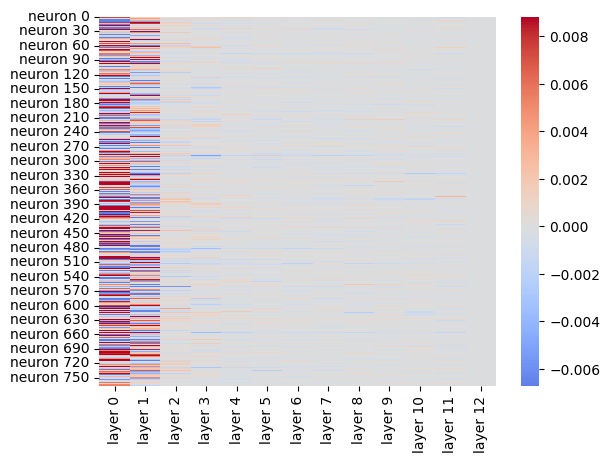

In [22]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

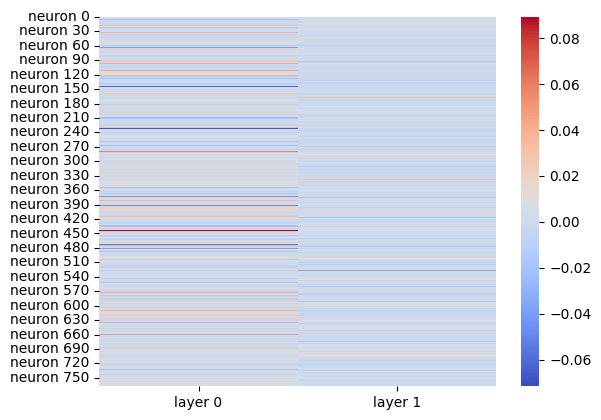

In [23]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

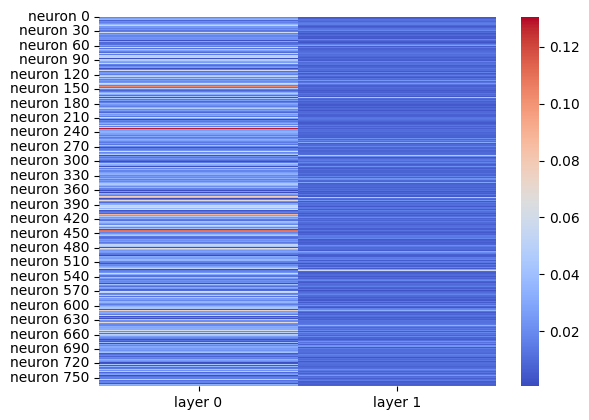

In [24]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm')

### Fine tuning 전,후 비교

In [25]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 500    0.075680
neuron 536    0.062288
neuron 252    0.059338
neuron 138    0.058468
neuron 591    0.053357
neuron 69     0.048736
neuron 506    0.043850
neuron 104    0.043617
neuron 221    0.042819
neuron 88     0.042372
neuron 610    0.040351
neuron 562    0.039841
neuron 592    0.039389
neuron 189    0.038607
neuron 579    0.038007
neuron 418    0.035583
neuron 696    0.034856
neuron 370    0.034727
neuron 692    0.034478
neuron 148    0.034012
Name: layer 0, dtype: float64

neuron 138    0.133794
neuron 378    0.116899
neuron 447    0.070485
neuron 433    0.029172
neuron 599    0.022735
neuron 701    0.022087
neuron 570    0.019630
neuron 264    0.019301
neuron 210    0.019095
neuron 376    0.019031
neuron 535    0.018773
neuron 457    0.018479
neuron 446    0.018469
neuron 49     0.018277
neuron 641    0.018079
neuron 569    0.017869
neuron 64     0.017574
neuron 286    0.017343
neuron 716    0.017047
neuron 51     0.016326
Name: layer 1, dtype: float64

In [26]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 444    0.089270
neuron 461    0.077119
neuron 171    0.076680
neuron 759    0.058943
neuron 280    0.057977
neuron 642    0.056462
neuron 368    0.056148
neuron 220    0.052146
neuron 696    0.043871
neuron 97     0.043333
neuron 111    0.042939
neuron 475    0.042197
neuron 189    0.041427
neuron 32     0.039013
neuron 381    0.038133
neuron 572    0.036958
neuron 122    0.036788
neuron 579    0.034321
neuron 415    0.034266
neuron 328    0.033915
Name: layer 0, dtype: float64

neuron 121    0.030361
neuron 167    0.028592
neuron 338    0.026474
neuron 81     0.022226
neuron 290    0.021794
neuron 656    0.021778
neuron 603    0.020027
neuron 119    0.018699
neuron 312    0.018173
neuron 47     0.018082
neuron 640    0.017554
neuron 521    0.016730
neuron 285    0.016657
neuron 249    0.016431
neuron 641    0.016394
neuron 402    0.016234
neuron 500    0.016017
neuron 183    0.015725
neuron 584    0.015403
neuron 376    0.014735
Name: layer 1, dtype: float64

In [27]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 316   -0.029436
neuron 364   -0.030841
neuron 480   -0.031113
neuron 406   -0.031160
neuron 523   -0.031387
neuron 22    -0.032313
neuron 266   -0.032345
neuron 415   -0.032495
neuron 200   -0.032902
neuron 444   -0.032950
neuron 87    -0.033175
neuron 447   -0.034766
neuron 322   -0.035256
neuron 752   -0.036299
neuron 433   -0.037695
neuron 346   -0.038649
neuron 280   -0.039498
neuron 760   -0.047444
neuron 656   -0.053114
neuron 50    -0.063499
Name: layer 0, dtype: float64

neuron 656   -0.013022
neuron 13    -0.013274
neuron 186   -0.013532
neuron 607   -0.013761
neuron 0     -0.013937
neuron 654   -0.013981
neuron 545   -0.015180
neuron 375   -0.015821
neuron 523   -0.016982
neuron 557   -0.017487
neuron 425   -0.017872
neuron 666   -0.019630
neuron 33    -0.019864
neuron 161   -0.021301
neuron 10    -0.022592
neuron 676   -0.024790
neuron 98    -0.024900
neuron 55    -0.025468
neuron 678   -0.033472
neuron 658   -0.038970
Name: layer 1, dtype: float64

In [28]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 673   -0.028448
neuron 630   -0.029615
neuron 98    -0.030008
neuron 542   -0.030059
neuron 0     -0.031180
neuron 449   -0.032396
neuron 605   -0.034832
neuron 481   -0.037674
neuron 64    -0.038479
neuron 434   -0.039595
neuron 373   -0.043627
neuron 392   -0.048674
neuron 447   -0.049498
neuron 222   -0.049836
neuron 473   -0.052208
neuron 145   -0.061292
neuron 266   -0.062246
neuron 87    -0.065575
neuron 232   -0.068119
neuron 480   -0.071531
Name: layer 0, dtype: float64

neuron 117   -0.013723
neuron 591   -0.013848
neuron 477   -0.015378
neuron 417   -0.015554
neuron 665   -0.016003
neuron 93    -0.016114
neuron 19    -0.016429
neuron 378   -0.016932
neuron 674   -0.017043
neuron 133   -0.017110
neuron 65    -0.017192
neuron 375   -0.017609
neuron 416   -0.017713
neuron 748   -0.018864
neuron 98    -0.018918
neuron 60    -0.019269
neuron 301   -0.020403
neuron 559   -0.020576
neuron 527   -0.035115
neuron 447   -0.052649
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐